# Detectron2 Tutorial
Translated and Updated by [visionNoob](https://github.com/visionNoob)  
([원문](https://colab.research.google.com/drive/16jcaJoc6bCFAQ96jDe2HwtXj7BMD_-m5#scrollTo=roTj1N9F5uJ5)에서 내용이 각색되었습니다. 특히 Object Detection 관련 내용이 추가되었습니다)

<img src="https://dl.fbaipublicfiles.com/detectron2/Detectron2-Logo-Horz.png" width="500">

Detectron2에 오신것을 환영합니다! 이 튜토리얼 문서에서는 Detectron2의 기본적인 사용법을 다룹니다! 다루는 내용은 아래과 같습니다.

* Pretrained Model을 이미지와 비디오에 적용해보기
* 커스텀 데이터셋으로 detectron2 모델 학습시키기 

이 튜토리얼 문서를 활용해서 다양한 시도를 해보시기 바랍니다. 

# Chapter 1: Detectron2 설치하기

In [ ]:
# 종속 패키지(dependencies) 설치
!pip install -U torch torchvision cython
!pip install -U 'git+https://github.com/facebookresearch/fvcore.git' 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
torch.__version__

In [1]:
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -e detectron2_repo

Cloning into 'detectron2_repo'...
remote: Enumerating objects: 13167, done.
remote: Counting objects: 100% (668/668), done.
remote: Compressing objects: 100% (339/339), done.
remote: Total 13167 (delta 389), reused 531 (delta 325), pack-reused 12499
Receiving objects: 100% (13167/13167), 5.67 MiB | 15.62 MiB/s, done.
Resolving deltas: 100% (9349/9349), done.
Obtaining file:///content/detectron2_repo
     |████████████████████████████████| 49 kB 2.8 MB/s 
     |████████████████████████████████| 74 kB 3.0 MB/s 
     |████████████████████████████████| 145 kB 44.4 MB/s 
     |████████████████████████████████| 130 kB 61.7 MB/s 
     |████████████████████████████████| 747 kB 45.2 MB/s 
     |████████████████████████████████| 743 kB 36.5 MB/s 
     |████████████████████████████████| 636 kB 44.9 MB/s 
     |████████████████████████████████| 112 kB 64.9 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20210924-py3-none-any.whl size=60829 sha256=54238a9a1b0722abce2ceaa9df5eefb8c1c16b8

In [7]:
# 인스톨이 완료되면 Colab Runtime을 다시 시작해주세요. 

# 기본 설정
# detectron2 logger 설정
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# 자주 사용하는 라이브러리 임폴트
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# 자주 사용하는 detectron2 유틸 임폴트 
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

In [1]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("data4", {}, "/content/drive/MyDrive/TNT_VISION/COCOdataset.json", 
                                            "/content/drive/MyDrive/TNT_VISION/jpgimg")

In [3]:
import os
import numpy as np
import json
from detectron2.structures import BoxMode
import itertools
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg

cfg = get_cfg()
cfg.merge_from_file("./detectron2_repo/configs/COCO-Detection/retinanet_R_50_FPN_3x.yaml")
cfg.DATASETS.TRAIN = ("data4",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = "detectron2://COCO-Detection/retinanet_R_50_FPN_3x/137849486/model_final_4cafe0.pkl"  # initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.001
cfg.SOLVER.MAX_ITER =3000
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128 
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1 

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

Loading config ./detectron2_repo/configs/COCO-Detection/../Base-RetinaNet.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


[10/05 07:31:54 d2.engine.defaults]: Model:
RetinaNet(
  (backbone): FPN(
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelP6P7(
      (p6): Conv2d(2048, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (p7): Conv2d(256, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    )
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res2)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[10/05 07:32:16 d2.utils.events]:  eta: 0:49:50  iter: 19  total_loss: 1.77  loss_cls: 1.385  loss_box_reg: 0.4141  time: 1.0061  data_time: 0.0658  lr: 1.9981e-05  max_mem: 3996M
[10/05 07:32:26 d2.utils.events]:  eta: 0:45:40  iter: 39  total_loss: 1.398  loss_cls: 1.064  loss_box_reg: 0.313  time: 0.7409  data_time: 0.1174  lr: 3.9961e-05  max_mem: 3996M
[10/05 07:32:35 d2.utils.events]:  eta: 0:23:04  iter: 59  total_loss: 0.961  loss_cls: 0.6279  loss_box_reg: 0.29  time: 0.6381  data_time: 0.1442  lr: 5.9941e-05  max_mem: 3996M
[10/05 07:32:43 d2.utils.events]:  eta: 0:22:40  iter: 79  total_loss: 0.7128  loss_cls: 0.4869  loss_box_reg: 0.2296  time: 0.5873  data_time: 0.1259  lr: 7.9921e-05  max_mem: 3996M
[10/05 07:32:52 d2.utils.events]:  eta: 0:22:11  iter: 99  total_loss: 0.6323  loss_cls: 0.4057  loss_box_reg: 0.2079  time: 0.5551  data_time: 0.1167  lr: 9.9901e-05  max_mem: 3996M
[10/05 07:33:01 d2.utils.events]:  eta: 0:21:51  iter: 119  total_loss: 0.5684  loss_cls: 0.29

In [8]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.1   # set the testing threshold for this model
cfg.DATASETS.TEST = ("dat",)
predictor = DefaultPredictor(cfg)

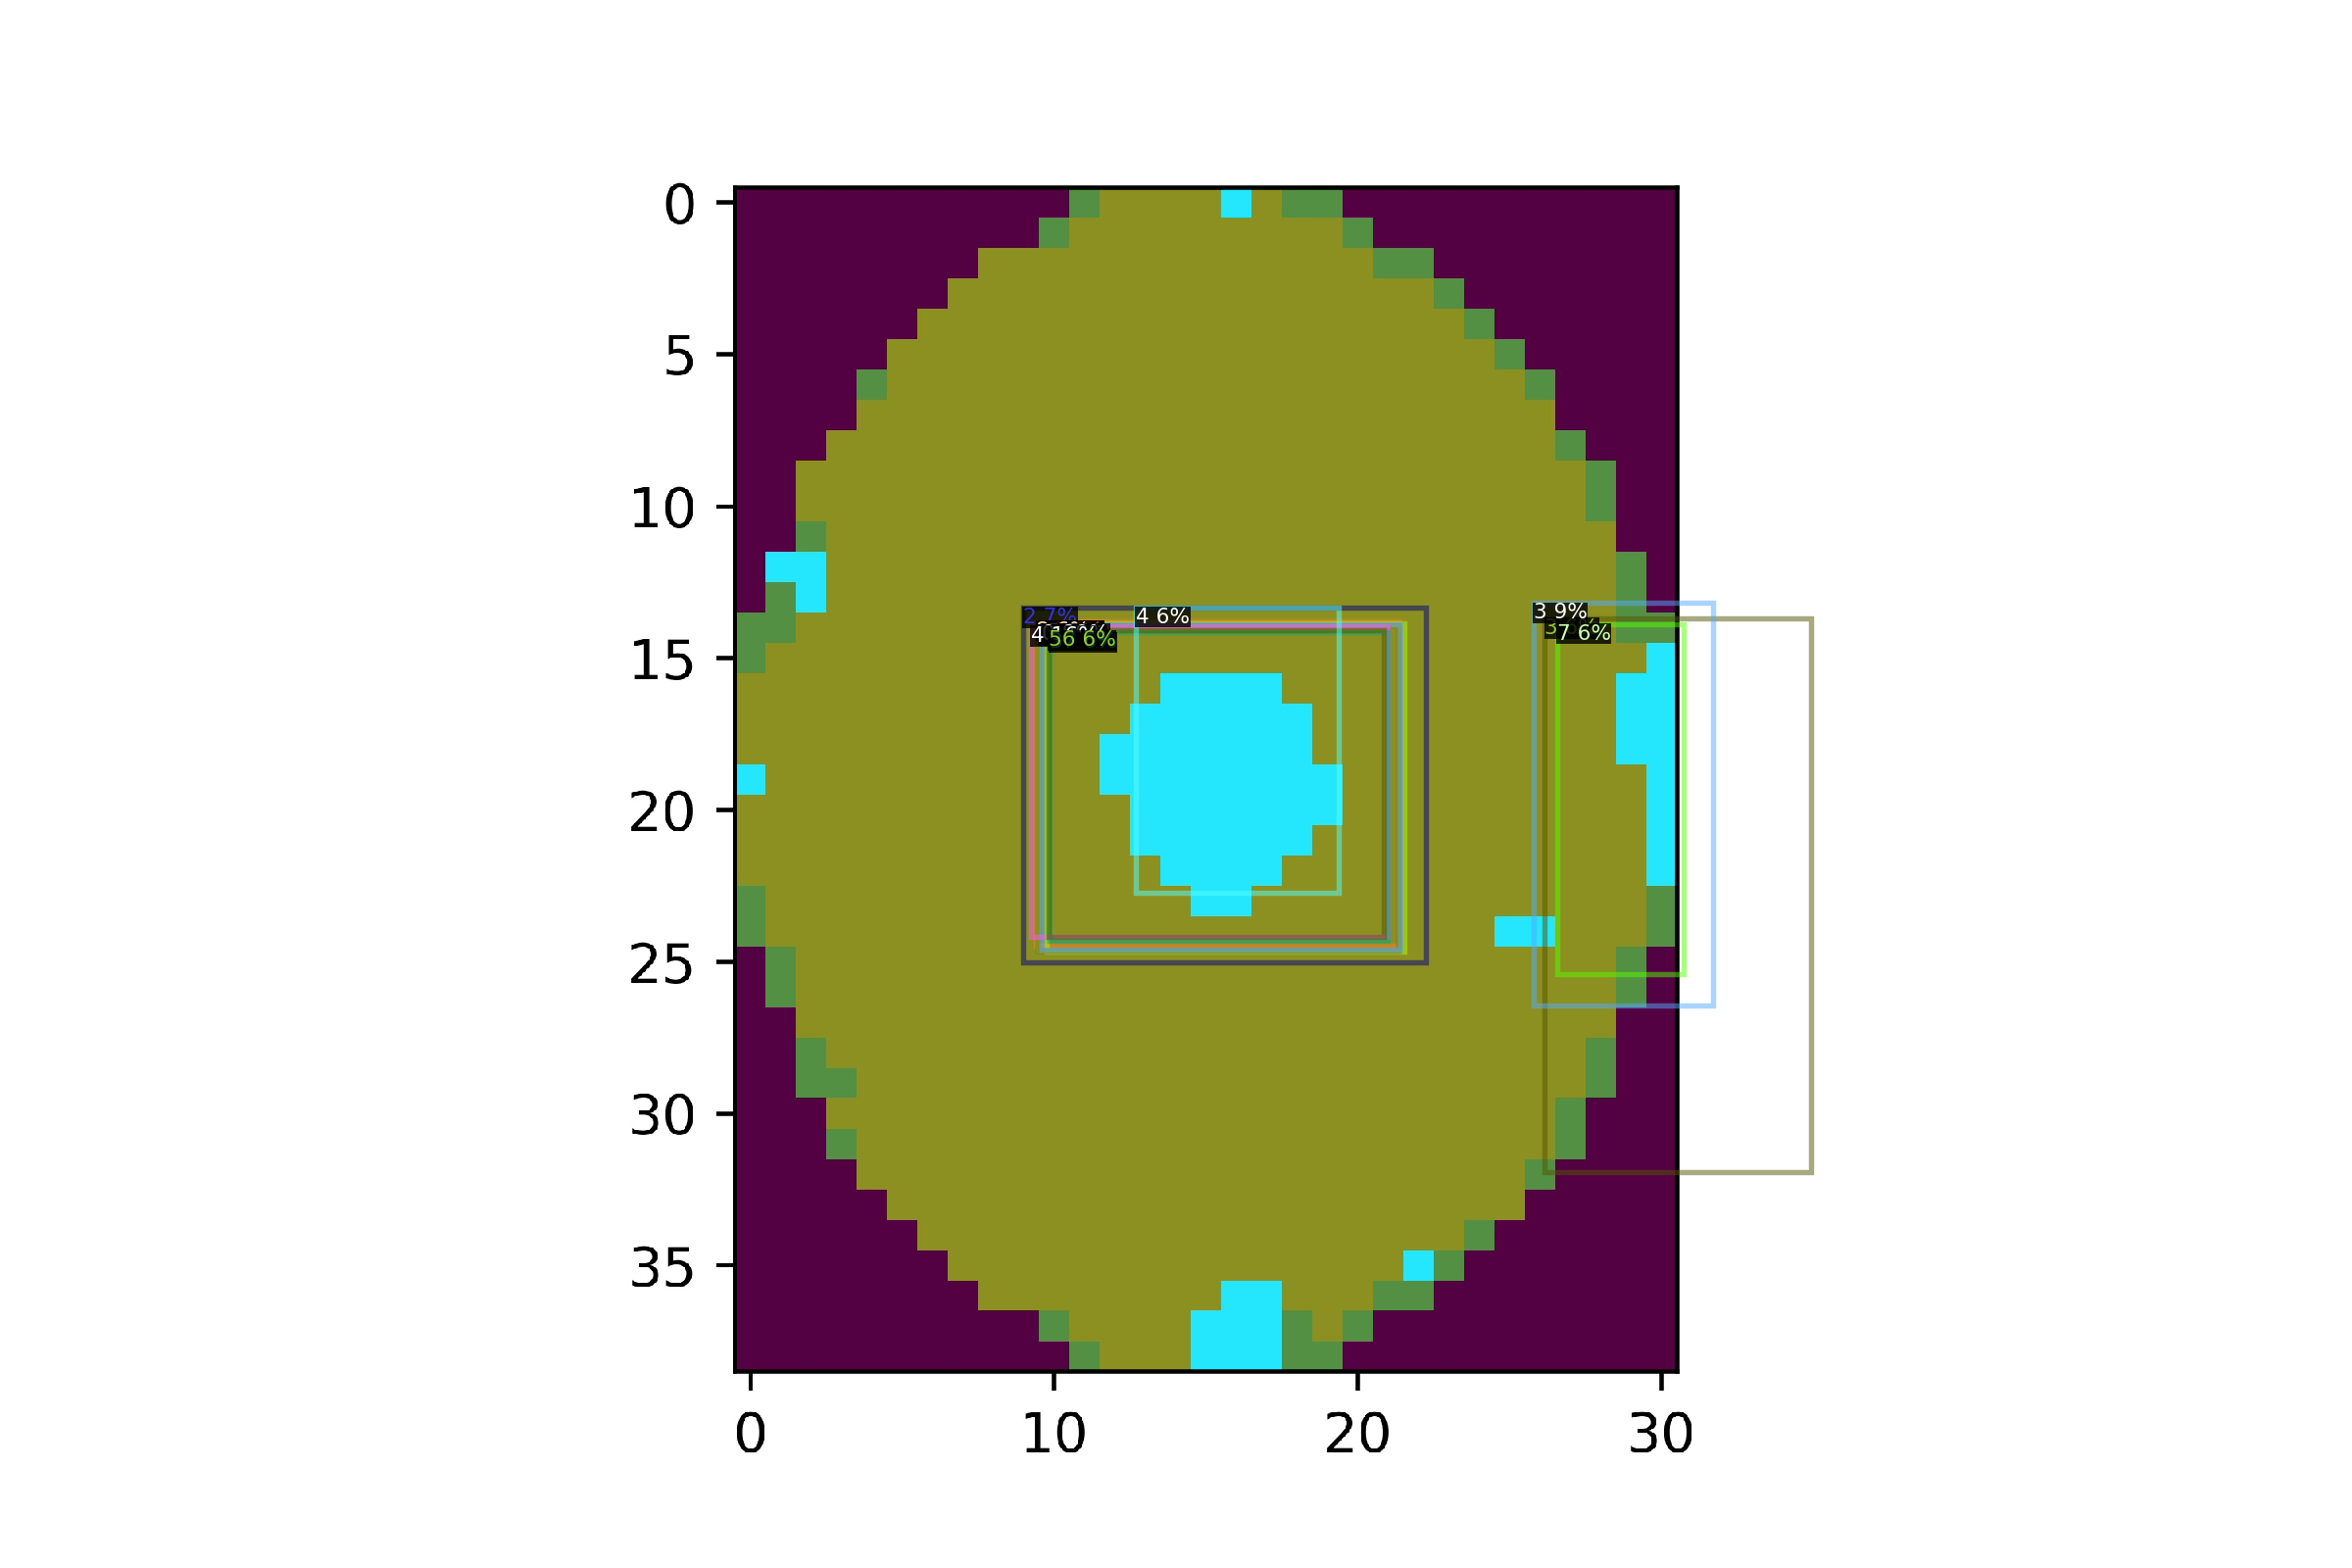

In [13]:
from detectron2.utils.visualizer import ColorMode
im = cv2.imread("/content/drive/MyDrive/TNT_VISION/testimg/center83.jpg")
outputs = predictor(im)
v = Visualizer(im[:, :, ::-1],
                   scale=0.8
    )
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

In [14]:
outputs

{'instances': Instances(num_instances=16, image_height=2000, image_width=3000, fields=[pred_boxes: Boxes(tensor([[1329.2621,  796.1215, 1786.2339, 1210.9282],
         [1314.6140,  798.6811, 1769.5502, 1195.0111],
         [1955.9863,  768.9465, 2184.5996, 1282.2847],
         [1304.8213,  774.8743, 1819.3379, 1227.7937],
         [1321.7572,  792.2134, 1784.9412, 1205.6971],
         [1970.3911,  788.8719, 2310.2854, 1494.7102],
         [1321.7572,  792.2134, 1784.9412, 1205.6971],
         [1321.7572,  792.2134, 1784.9412, 1205.6971],
         [1323.9406,  797.6682, 1783.1398, 1213.0857],
         [1448.6334,  774.5800, 1707.9242, 1139.3074],
         [1985.8071,  795.7874, 2147.2490, 1242.9836],
         [1336.9333,  804.2883, 1765.2639, 1194.6978],
         [1338.7865,  806.6475, 1769.5350, 1199.7626],
         [1323.9406,  797.6682, 1783.1398, 1213.0857],
         [1323.9406,  797.6682, 1783.1398, 1213.0857],
         [1334.7349,  795.5298, 1791.0266, 1214.2046]], device='cuda:0'

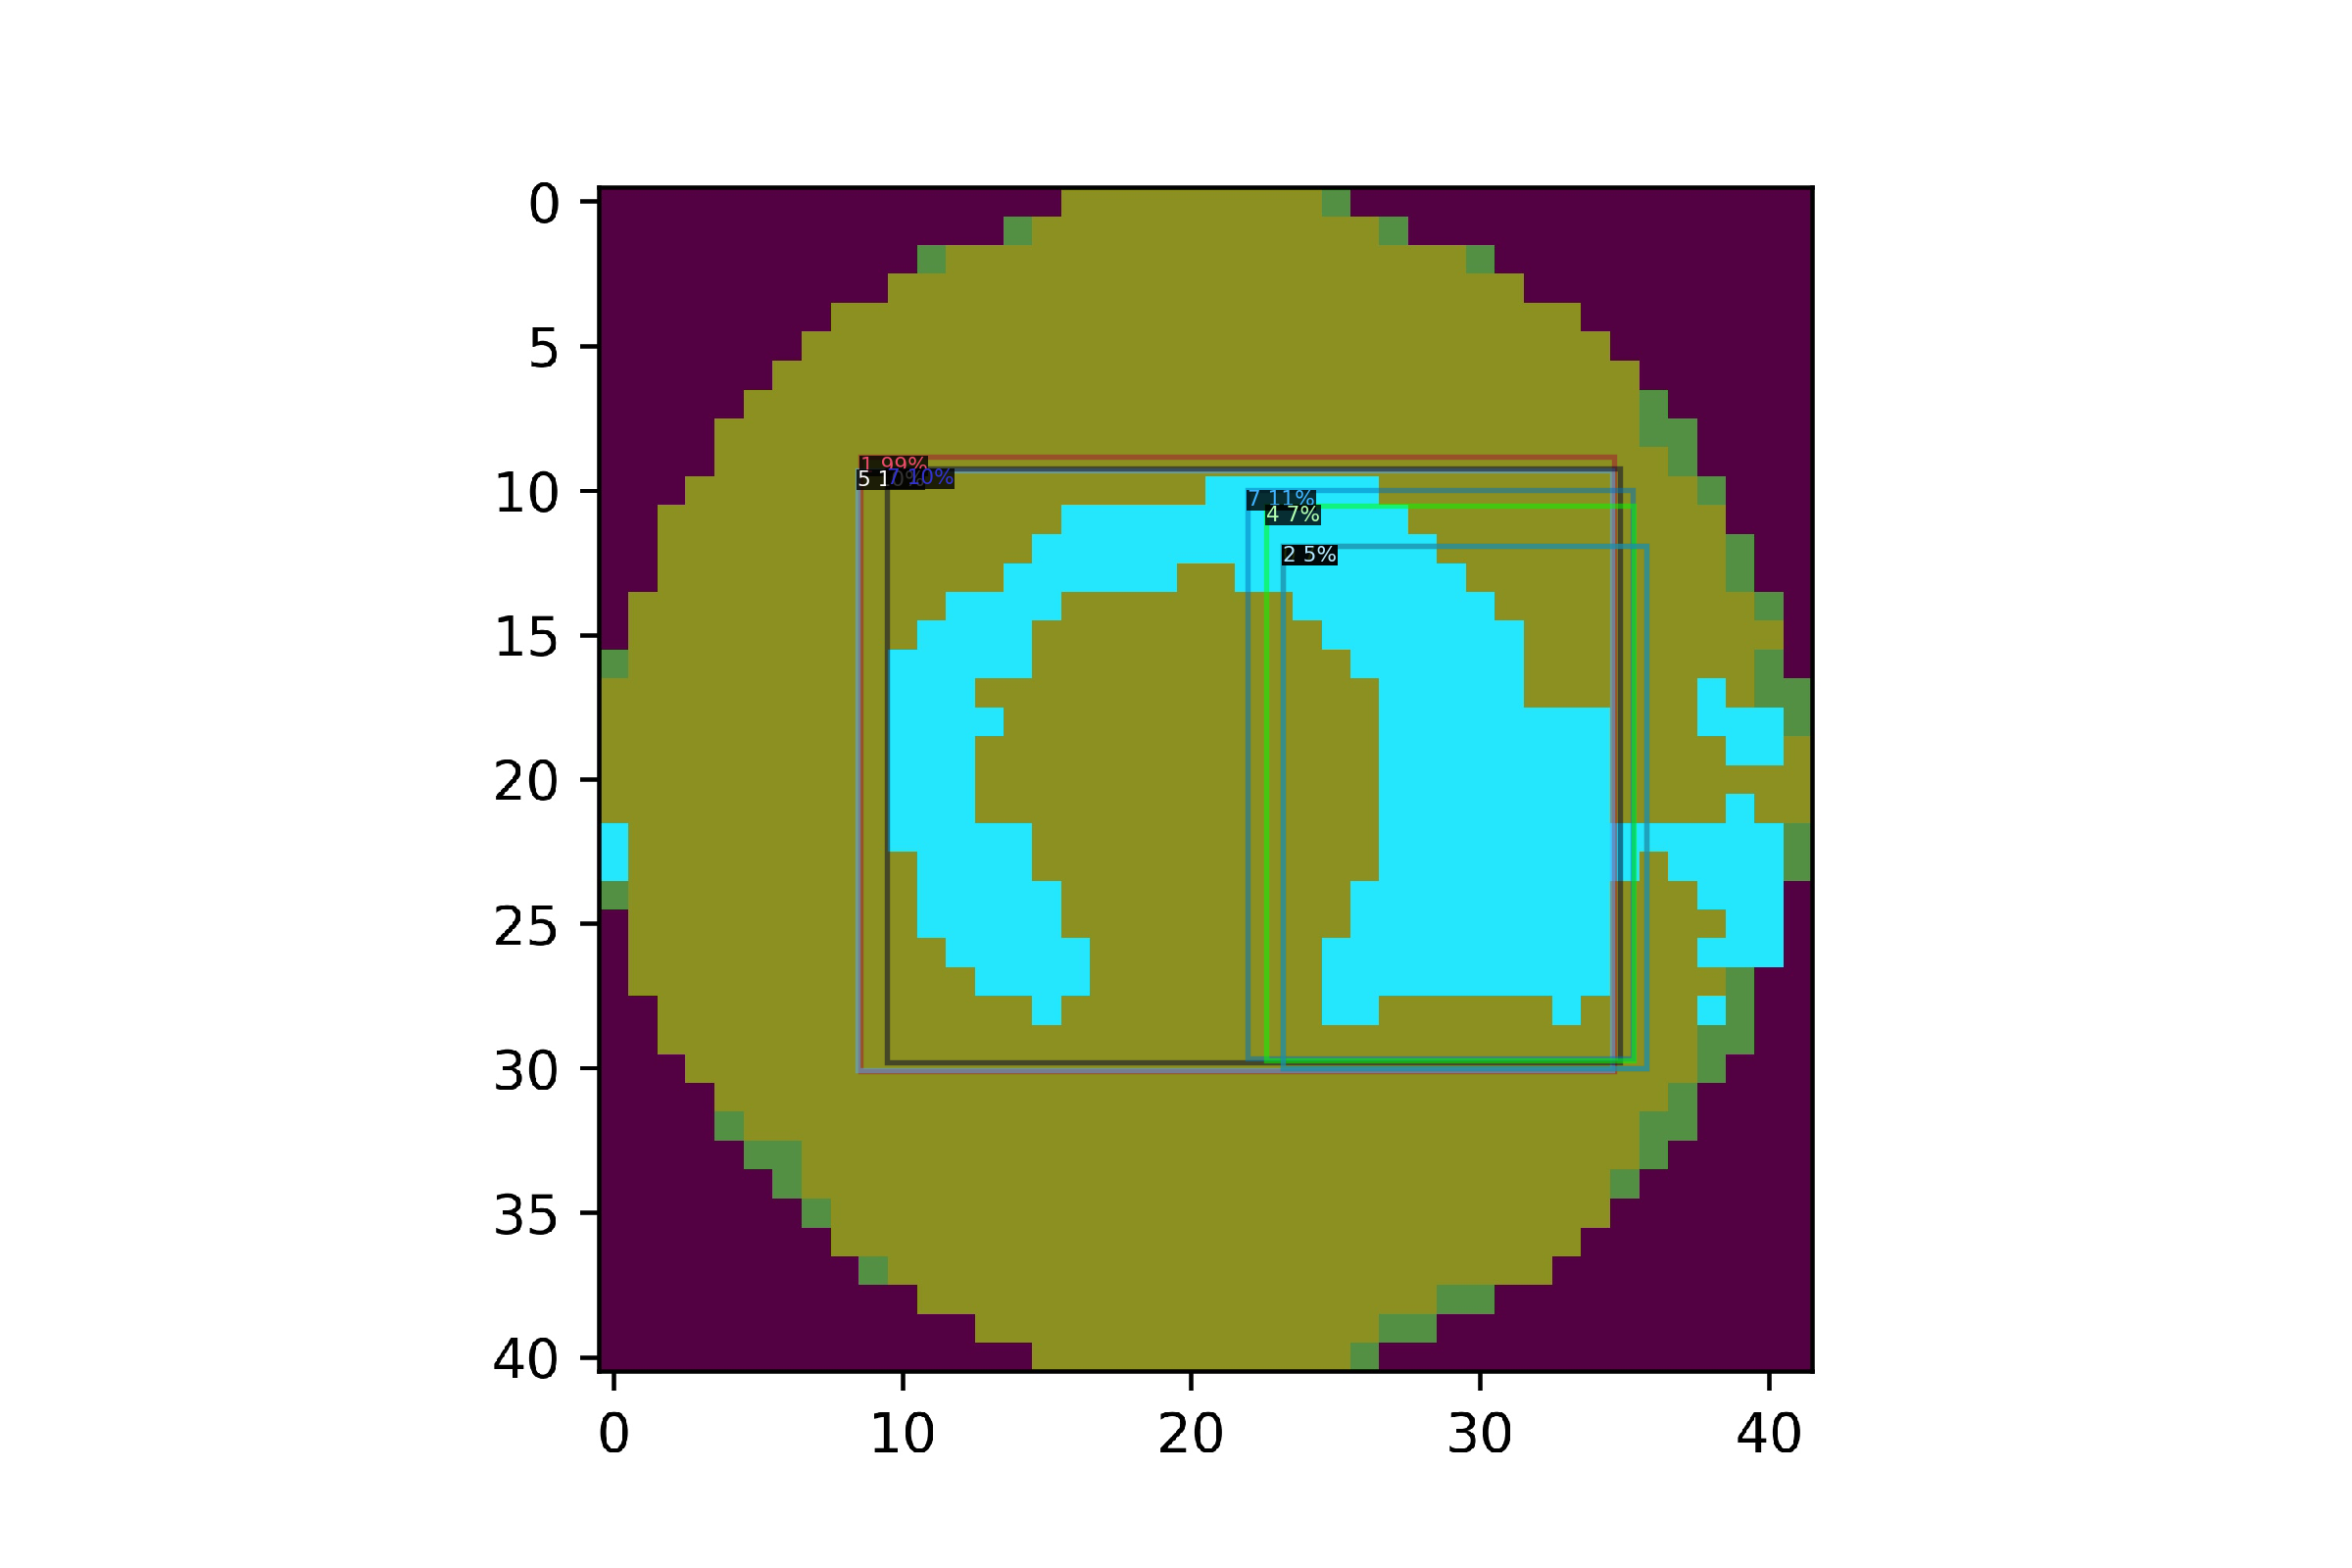

In [16]:
from detectron2.utils.visualizer import ColorMode
im = cv2.imread("/content/drive/MyDrive/TNT_VISION/testimg/donut92.jpg")
outputs = predictor(im)
v = Visualizer(im[:, :, ::-1],
                   scale=0.8
    )
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

In [17]:
outputs

{'instances': Instances(num_instances=7, image_height=2000, image_width=3000, fields=[pred_boxes: Boxes(tensor([[1097.3827,  581.9834, 2058.9907, 1365.9922],
         [1591.3638,  625.5609, 2081.9150, 1350.2087],
         [1131.0664,  597.8108, 2066.6094, 1355.0792],
         [1093.2402,  599.5320, 2056.5200, 1364.3921],
         [1615.1060,  644.4128, 2084.3242, 1352.0007],
         [1636.2360,  695.9203, 2100.0317, 1362.6882],
         [1636.2360,  695.9203, 2100.0317, 1362.6882]], device='cuda:0')), scores: tensor([0.9936, 0.1114, 0.1033, 0.0988, 0.0681, 0.0671, 0.0540],
        device='cuda:0'), pred_classes: tensor([1, 7, 7, 5, 4, 0, 2], device='cuda:0')])}

Center :0, Donut : 1, Edge-Loc : 2, Edge-Ring : 3, Loc : 4, Near-full : 5,Random : 6,Scratch : 7, none : 8

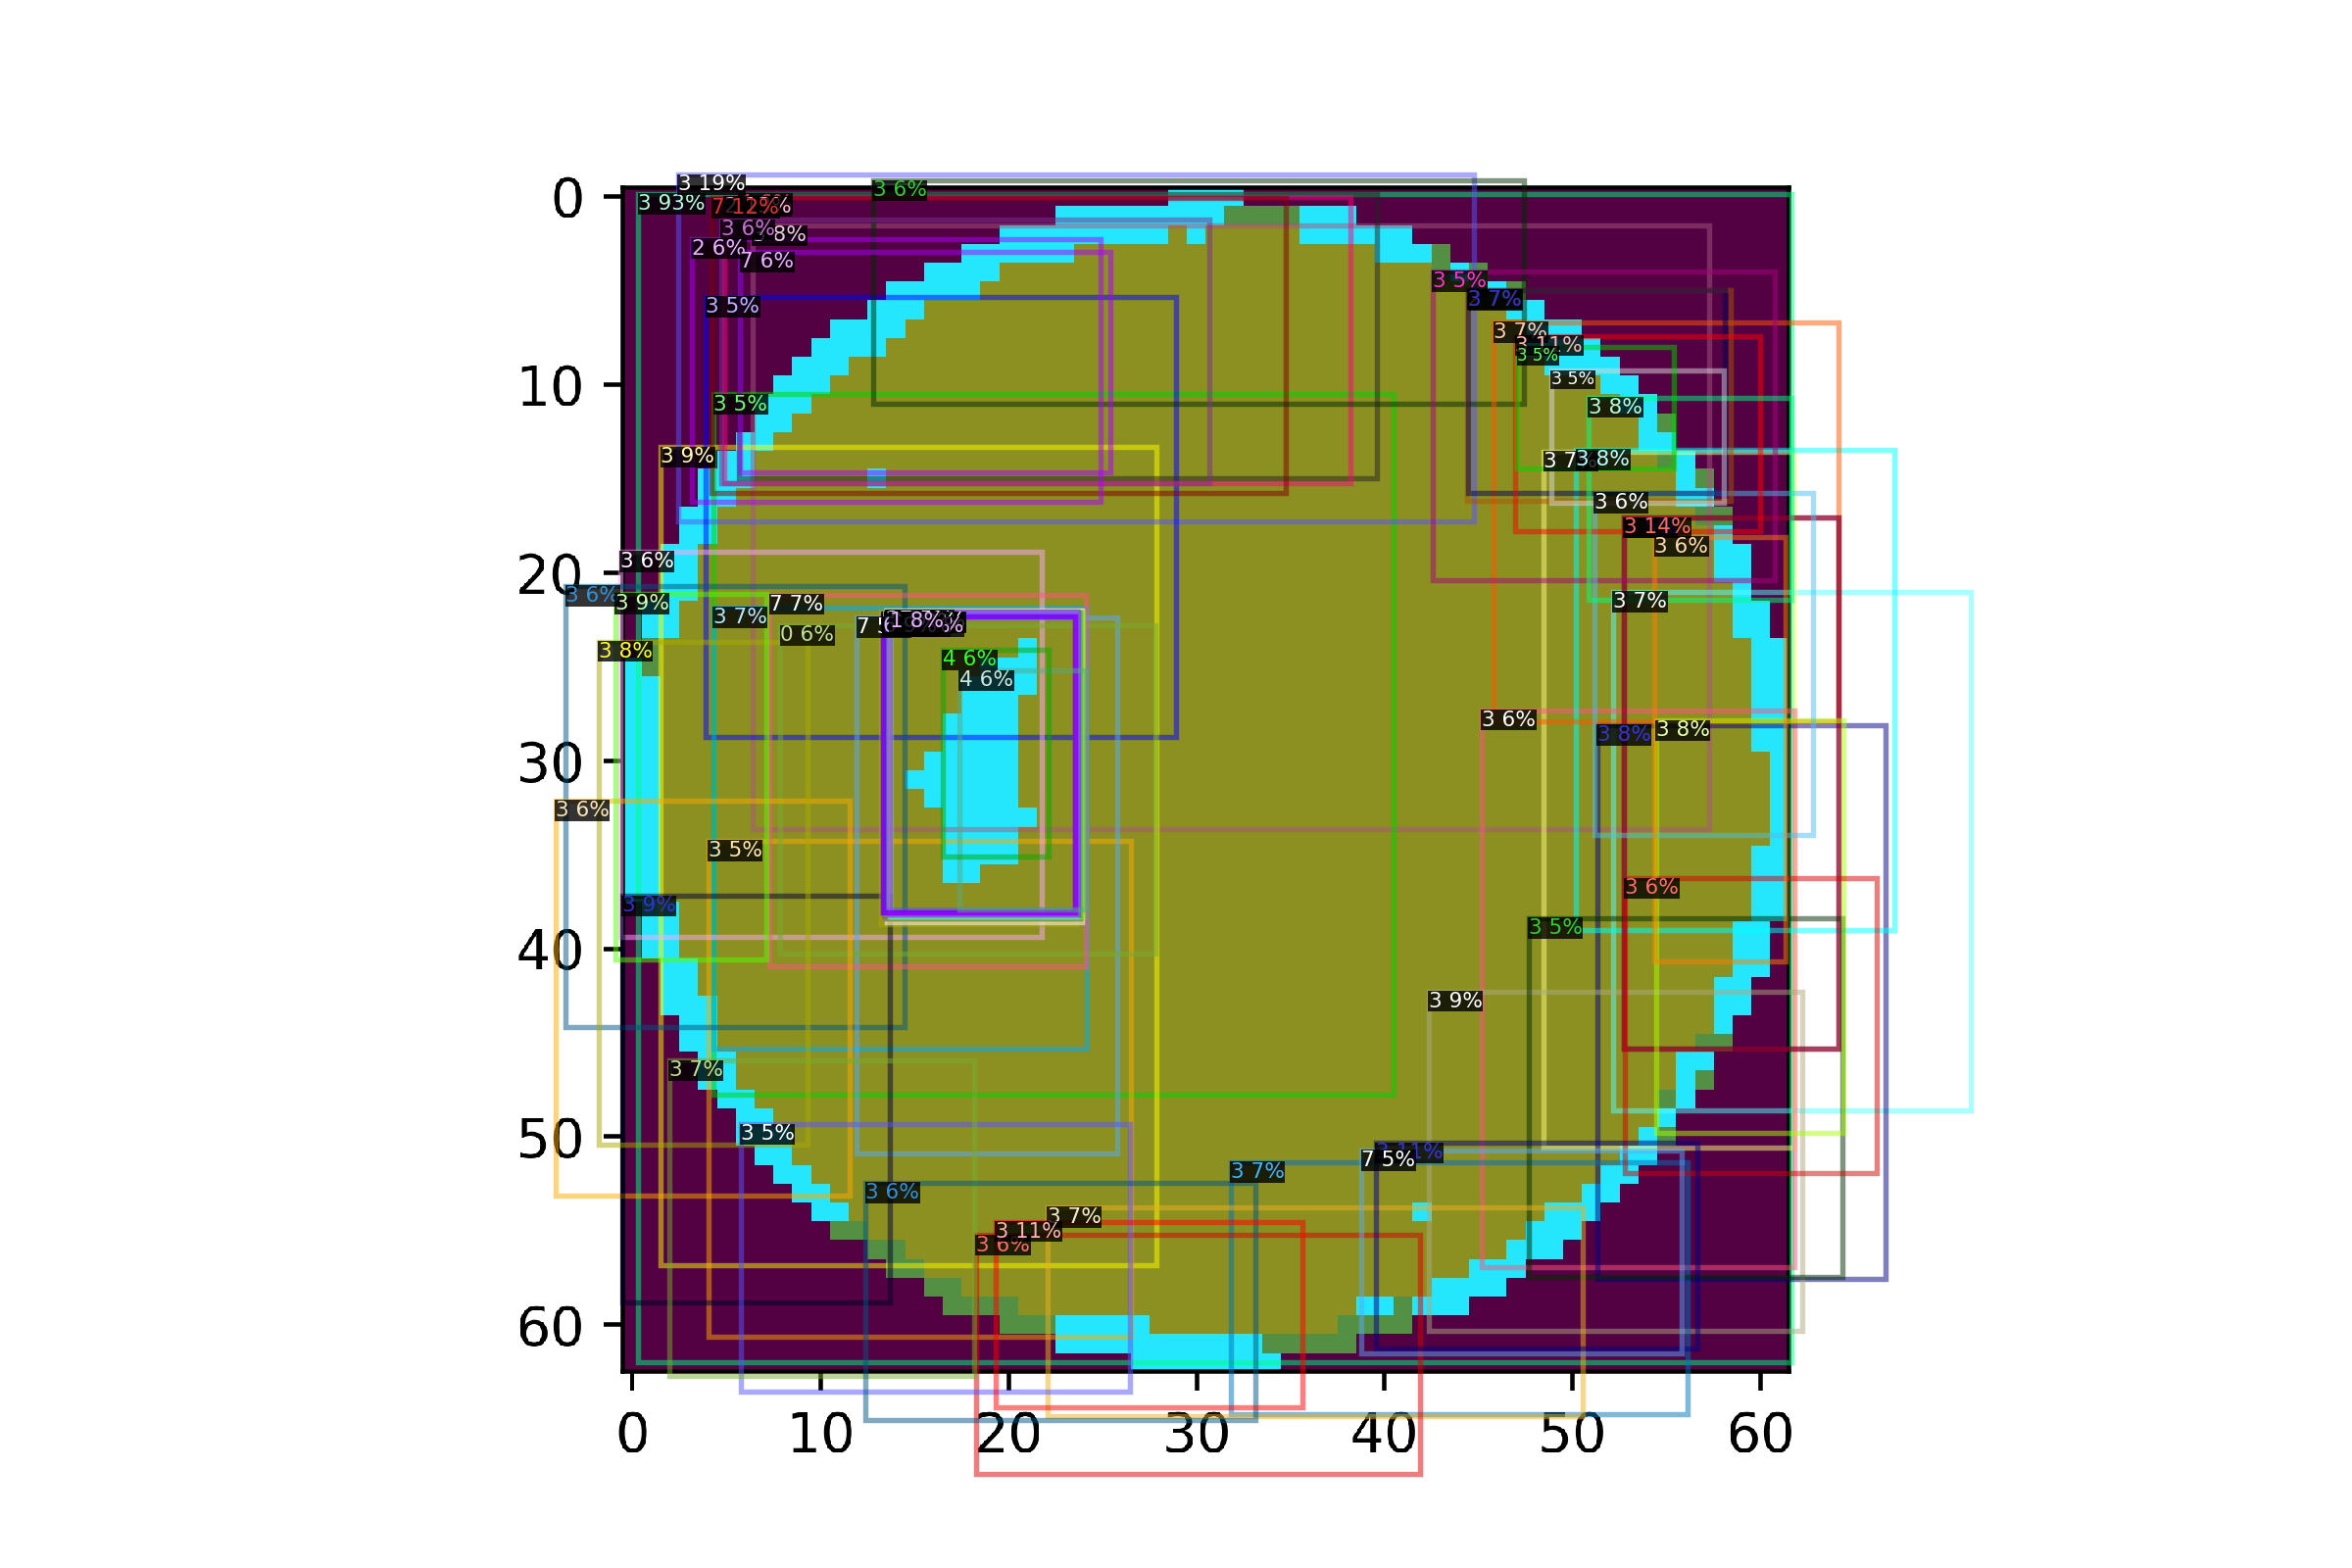

In [29]:
from detectron2.utils.visualizer import ColorMode
im = cv2.imread("/content/drive/MyDrive/TNT_VISION/testimg/edge_ring221.jpg")
outputs = predictor(im)
v = Visualizer(im[:, :, ::-1],
                   scale=0.8
    )
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

In [30]:
outputs

{'instances': Instances(num_instances=73, image_height=2000, image_width=3000, fields=[pred_boxes: Boxes(tensor([[ 813.9933,  247.3933, 2284.7729, 1738.0287],
         [1134.5889,  781.1337, 1373.5724, 1168.6361],
         [1128.0651,  782.5530, 1374.6196, 1160.0359],
         [ 865.1071,  222.7139, 1880.2476,  665.4144],
         [2070.7759,  660.4227, 2344.7271, 1337.5665],
         [ 923.8629,  251.0168, 1722.3264,  616.1542],
         [1128.5221,  780.3034, 1371.5479, 1166.5923],
         [ 907.8158,  252.8484, 1640.5137,  628.5585],
         [1754.7886, 1457.9607, 2164.4858, 1719.6874],
         [1136.3763,  781.5233, 1381.7832, 1170.1918],
         [1126.3529,  786.8558, 1371.4186, 1164.0178],
         [1269.7865, 1558.4290, 1661.4924, 1794.7097],
         [1932.7244,  428.2294, 2244.4653,  676.9370],
         [1128.8378,  781.7182, 1376.9550, 1171.0531],
         [1126.3529,  786.8558, 1371.4186, 1164.0178],
         [ 784.4642,  757.5250,  977.0914, 1224.2108],
         [1822.1

Center :0, Donut : 1, Edge-Loc : 2, Edge-Ring : 3, Loc : 4, Near-full : 5,Random : 6,Scratch : 7, none : 8



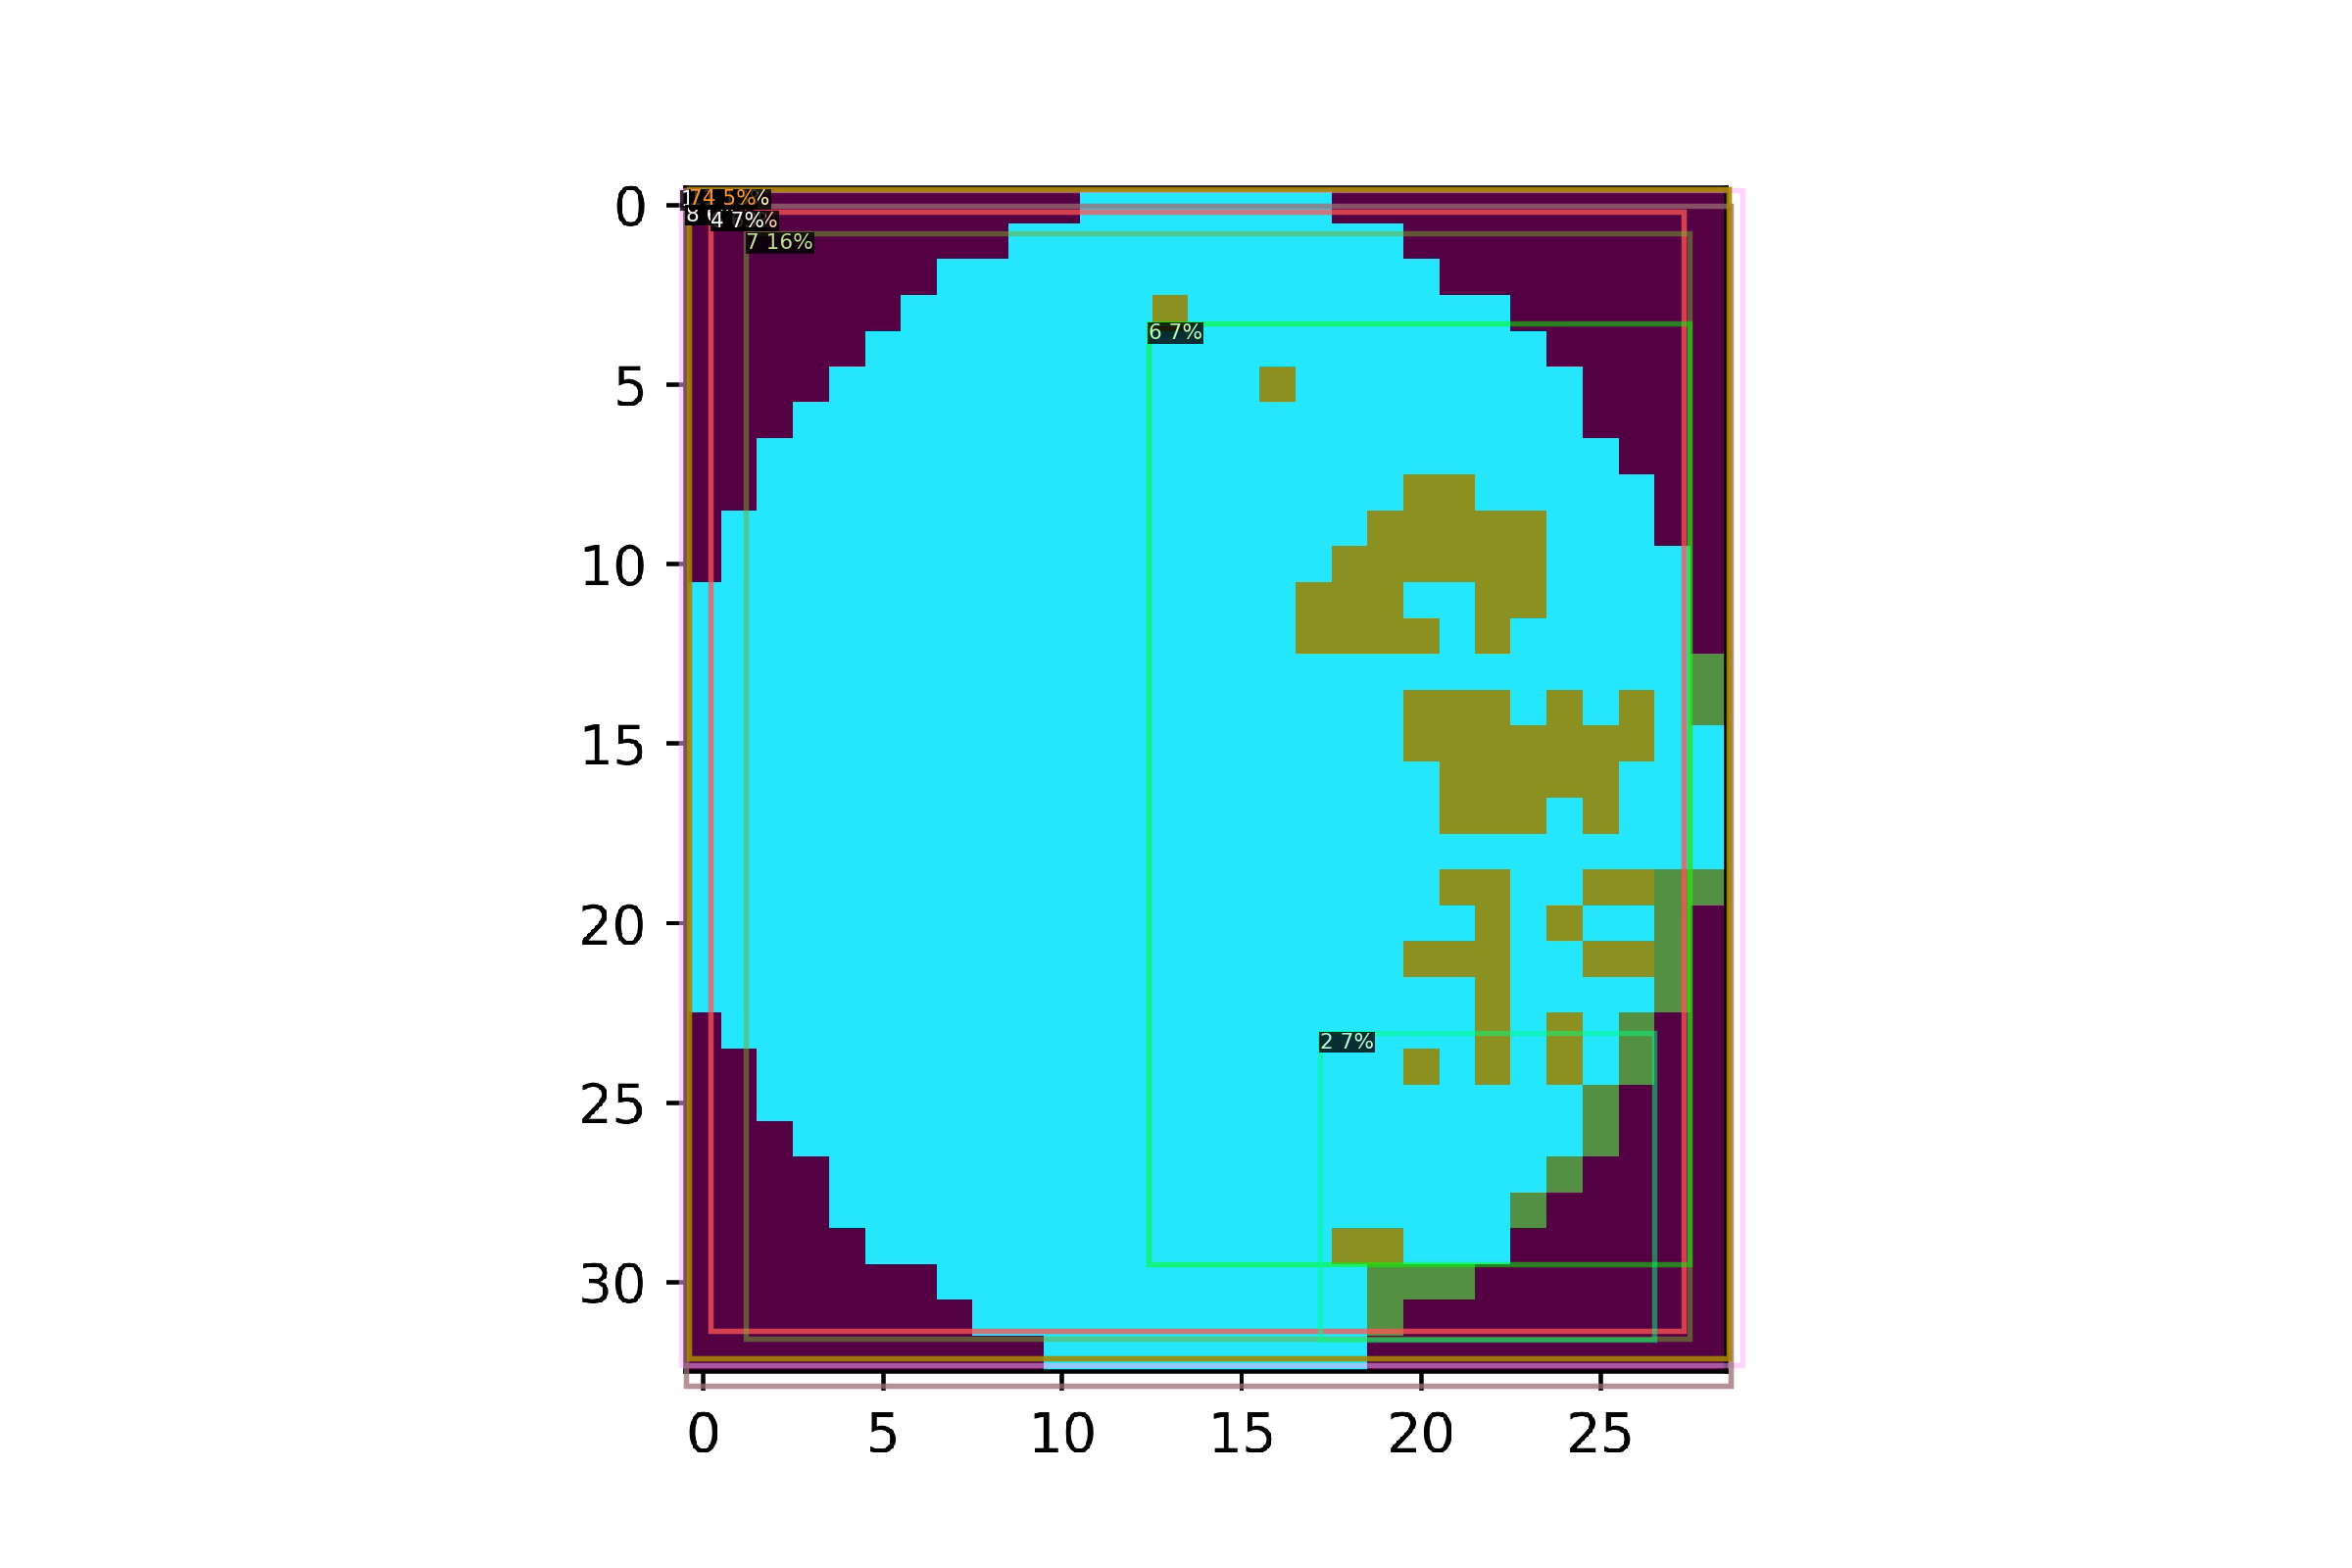

In [31]:
from detectron2.utils.visualizer import ColorMode
im = cv2.imread("/content/drive/MyDrive/TNT_VISION/testimg/nearfull (2).jpg")
outputs = predictor(im)
v = Visualizer(im[:, :, ::-1],
                   scale=0.8
    )
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

In [32]:
outputs

{'instances': Instances(num_instances=11, image_height=2000, image_width=3000, fields=[pred_boxes: Boxes(tensor([[ 874.9420,  262.2748, 2207.3101, 1767.6687],
         [ 906.7913,  269.6567, 2147.7222, 1697.7791],
         [ 951.7595,  297.5174, 2154.7783, 1707.8630],
         [ 879.3705,  241.7362, 2204.6382, 1732.3020],
         [ 879.3705,  241.7362, 2204.6382, 1732.3020],
         [1465.0690,  412.5912, 2155.3477, 1613.0159],
         [1683.7148, 1317.2798, 2109.7791, 1709.2225],
         [ 906.7913,  269.6567, 2147.7222, 1697.7791],
         [ 874.9420,  262.2748, 2207.3101, 1767.6687],
         [ 879.3705,  241.7362, 2204.6382, 1732.3020],
         [ 868.5060,  243.0463, 2221.9138, 1740.7396]], device='cuda:0')), scores: tensor([0.9142, 0.6260, 0.1613, 0.1286, 0.1272, 0.0732, 0.0727, 0.0693, 0.0561,
         0.0534, 0.0527], device='cuda:0'), pred_classes: tensor([ 5,  6,  7,  2, 11,  6,  2,  4,  8, 74, 12], device='cuda:0')])}

Center :0, Donut : 1, Edge-Loc : 2, Edge-Ring : 3, Loc : 4, Near-full : 5,Random : 6,Scratch : 7, none : 8

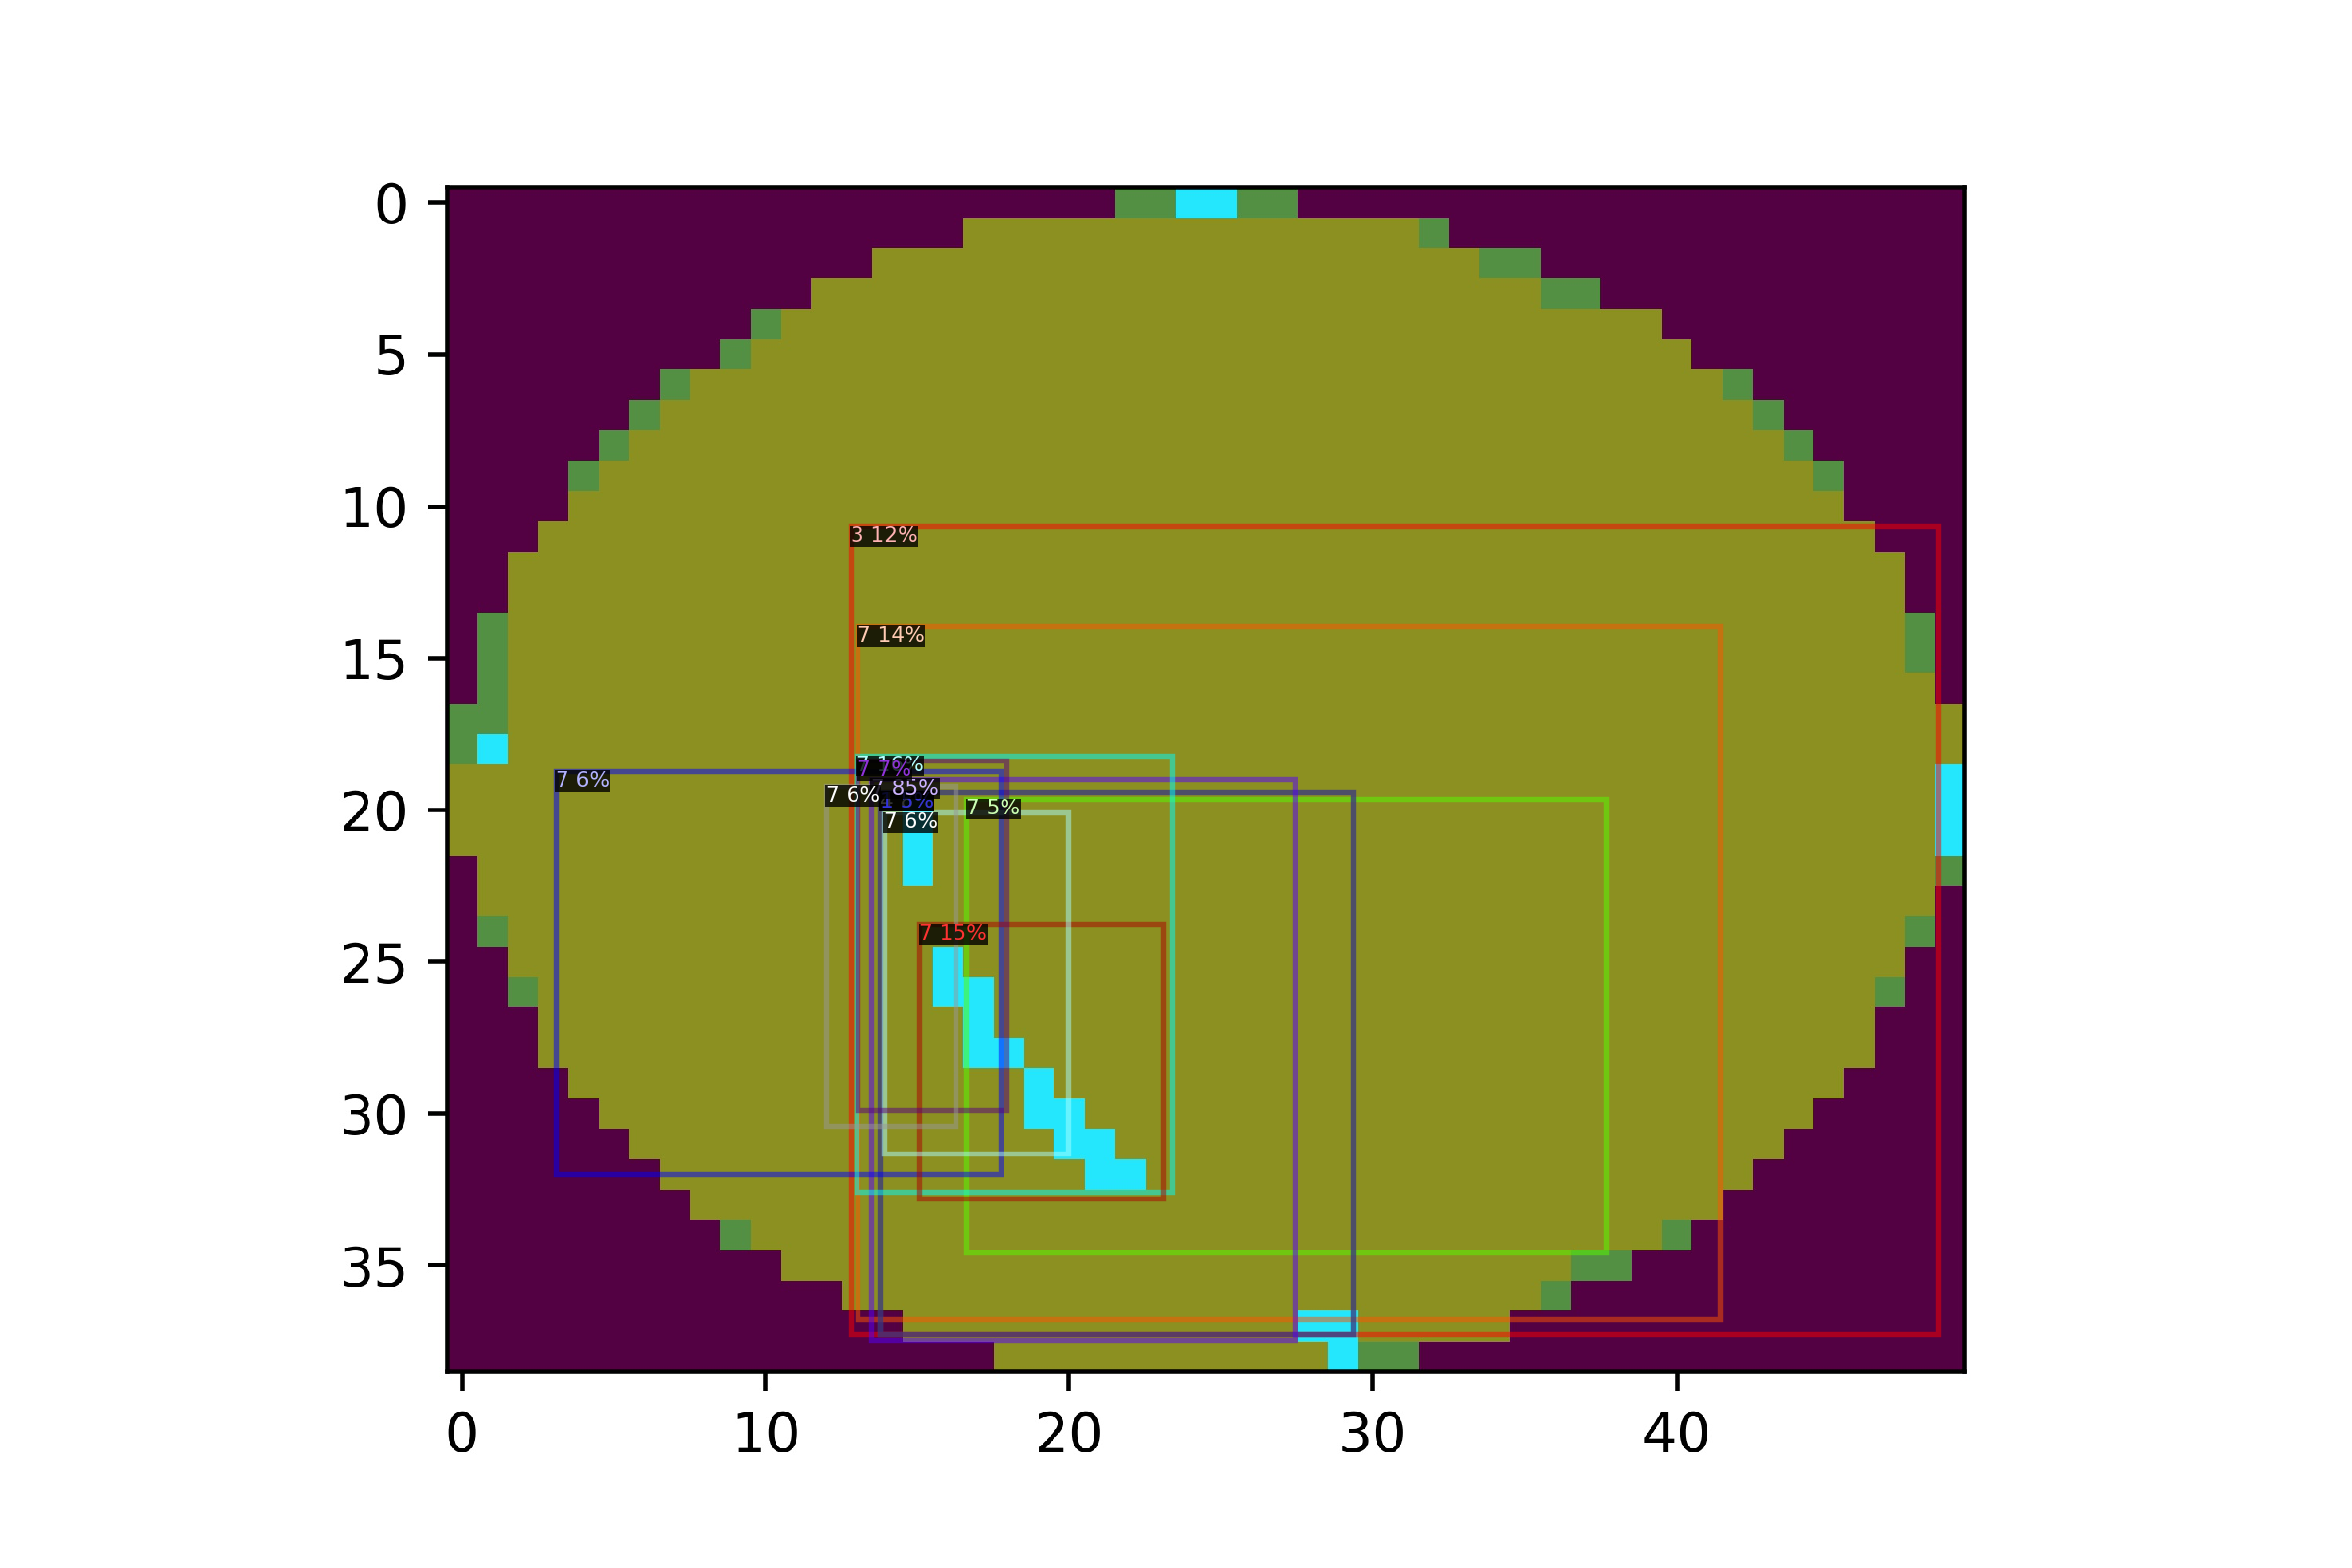

In [35]:
from detectron2.utils.visualizer import ColorMode
im = cv2.imread("/content/drive/MyDrive/TNT_VISION/testimg/scratch232.jpg")
outputs = predictor(im)
v = Visualizer(im[:, :, ::-1],
                   scale=0.8
    )
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

In [36]:
outputs

{'instances': Instances(num_instances=12, image_height=2000, image_width=3000, fields=[pred_boxes: Boxes(tensor([[1111.3453,  993.4326, 1651.8213, 1708.6176],
         [1091.9851,  963.9794, 1495.2222, 1519.9757],
         [1172.8549, 1179.1615, 1484.1133, 1528.2454],
         [1093.2924,  798.7975, 2193.7612, 1682.6174],
         [1084.3706,  671.8214, 2472.4595, 1701.5662],
         [1122.1161, 1009.7430, 1726.3804, 1700.6504],
         [1093.5745,  970.0727, 1283.4071, 1416.0394],
         [ 708.3194,  983.8895, 1275.9657, 1497.6111],
         [1053.4684, 1002.6012, 1219.2762, 1436.0626],
         [1127.0997, 1036.6298, 1362.0059, 1471.6786],
         [1232.7157, 1019.1989, 2048.4744, 1597.2800],
         [1122.1161, 1009.7430, 1726.3804, 1700.6504]], device='cuda:0')), scores: tensor([0.8465, 0.1554, 0.1470, 0.1423, 0.1151, 0.0820, 0.0732, 0.0643, 0.0643,
         0.0591, 0.0529, 0.0511], device='cuda:0'), pred_classes: tensor([7, 7, 7, 7, 3, 4, 7, 7, 7, 7, 7, 1], device='cuda:0')]

Center :0, Donut : 1, Edge-Loc : 2, Edge-Ring : 3, Loc : 4, Near-full : 5,Random : 6,Scratch : 7, none : 8

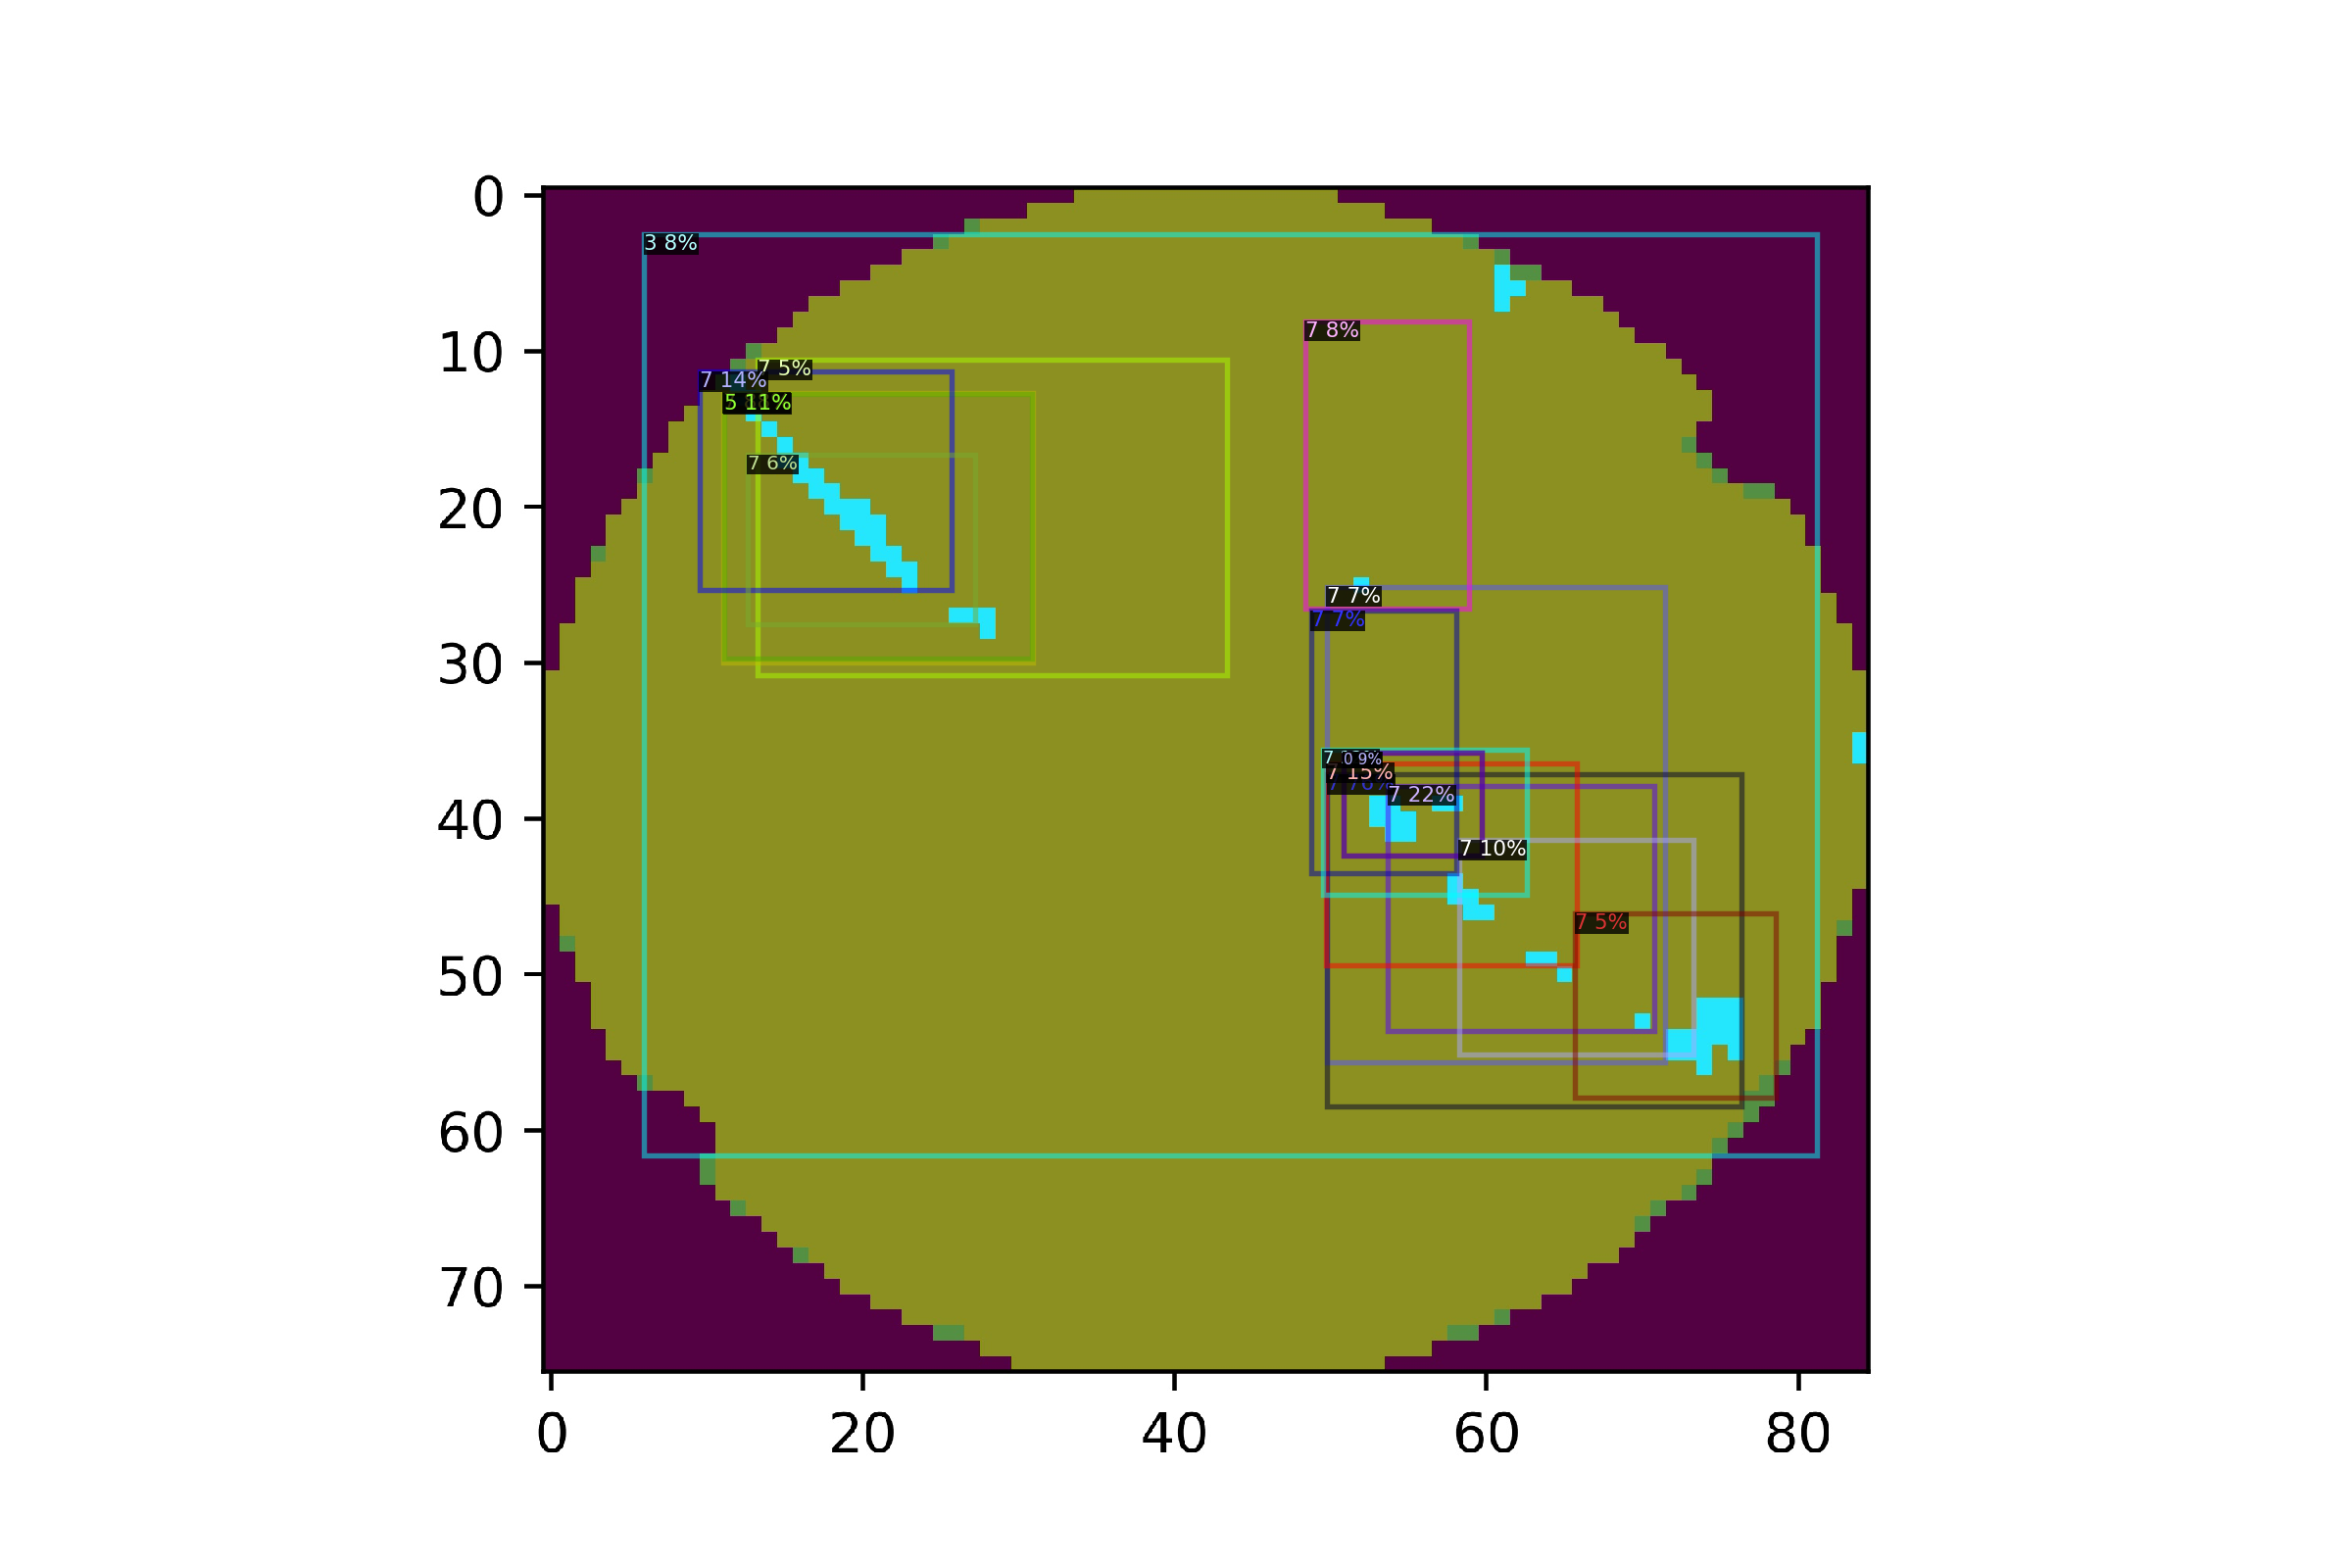

In [26]:
from detectron2.utils.visualizer import ColorMode
im = cv2.imread("/content/drive/MyDrive/TNT_VISION/testimg/scratch249.jpg")
outputs = predictor(im)
v = Visualizer(im[:, :, ::-1],
                   scale=0.8
    )
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

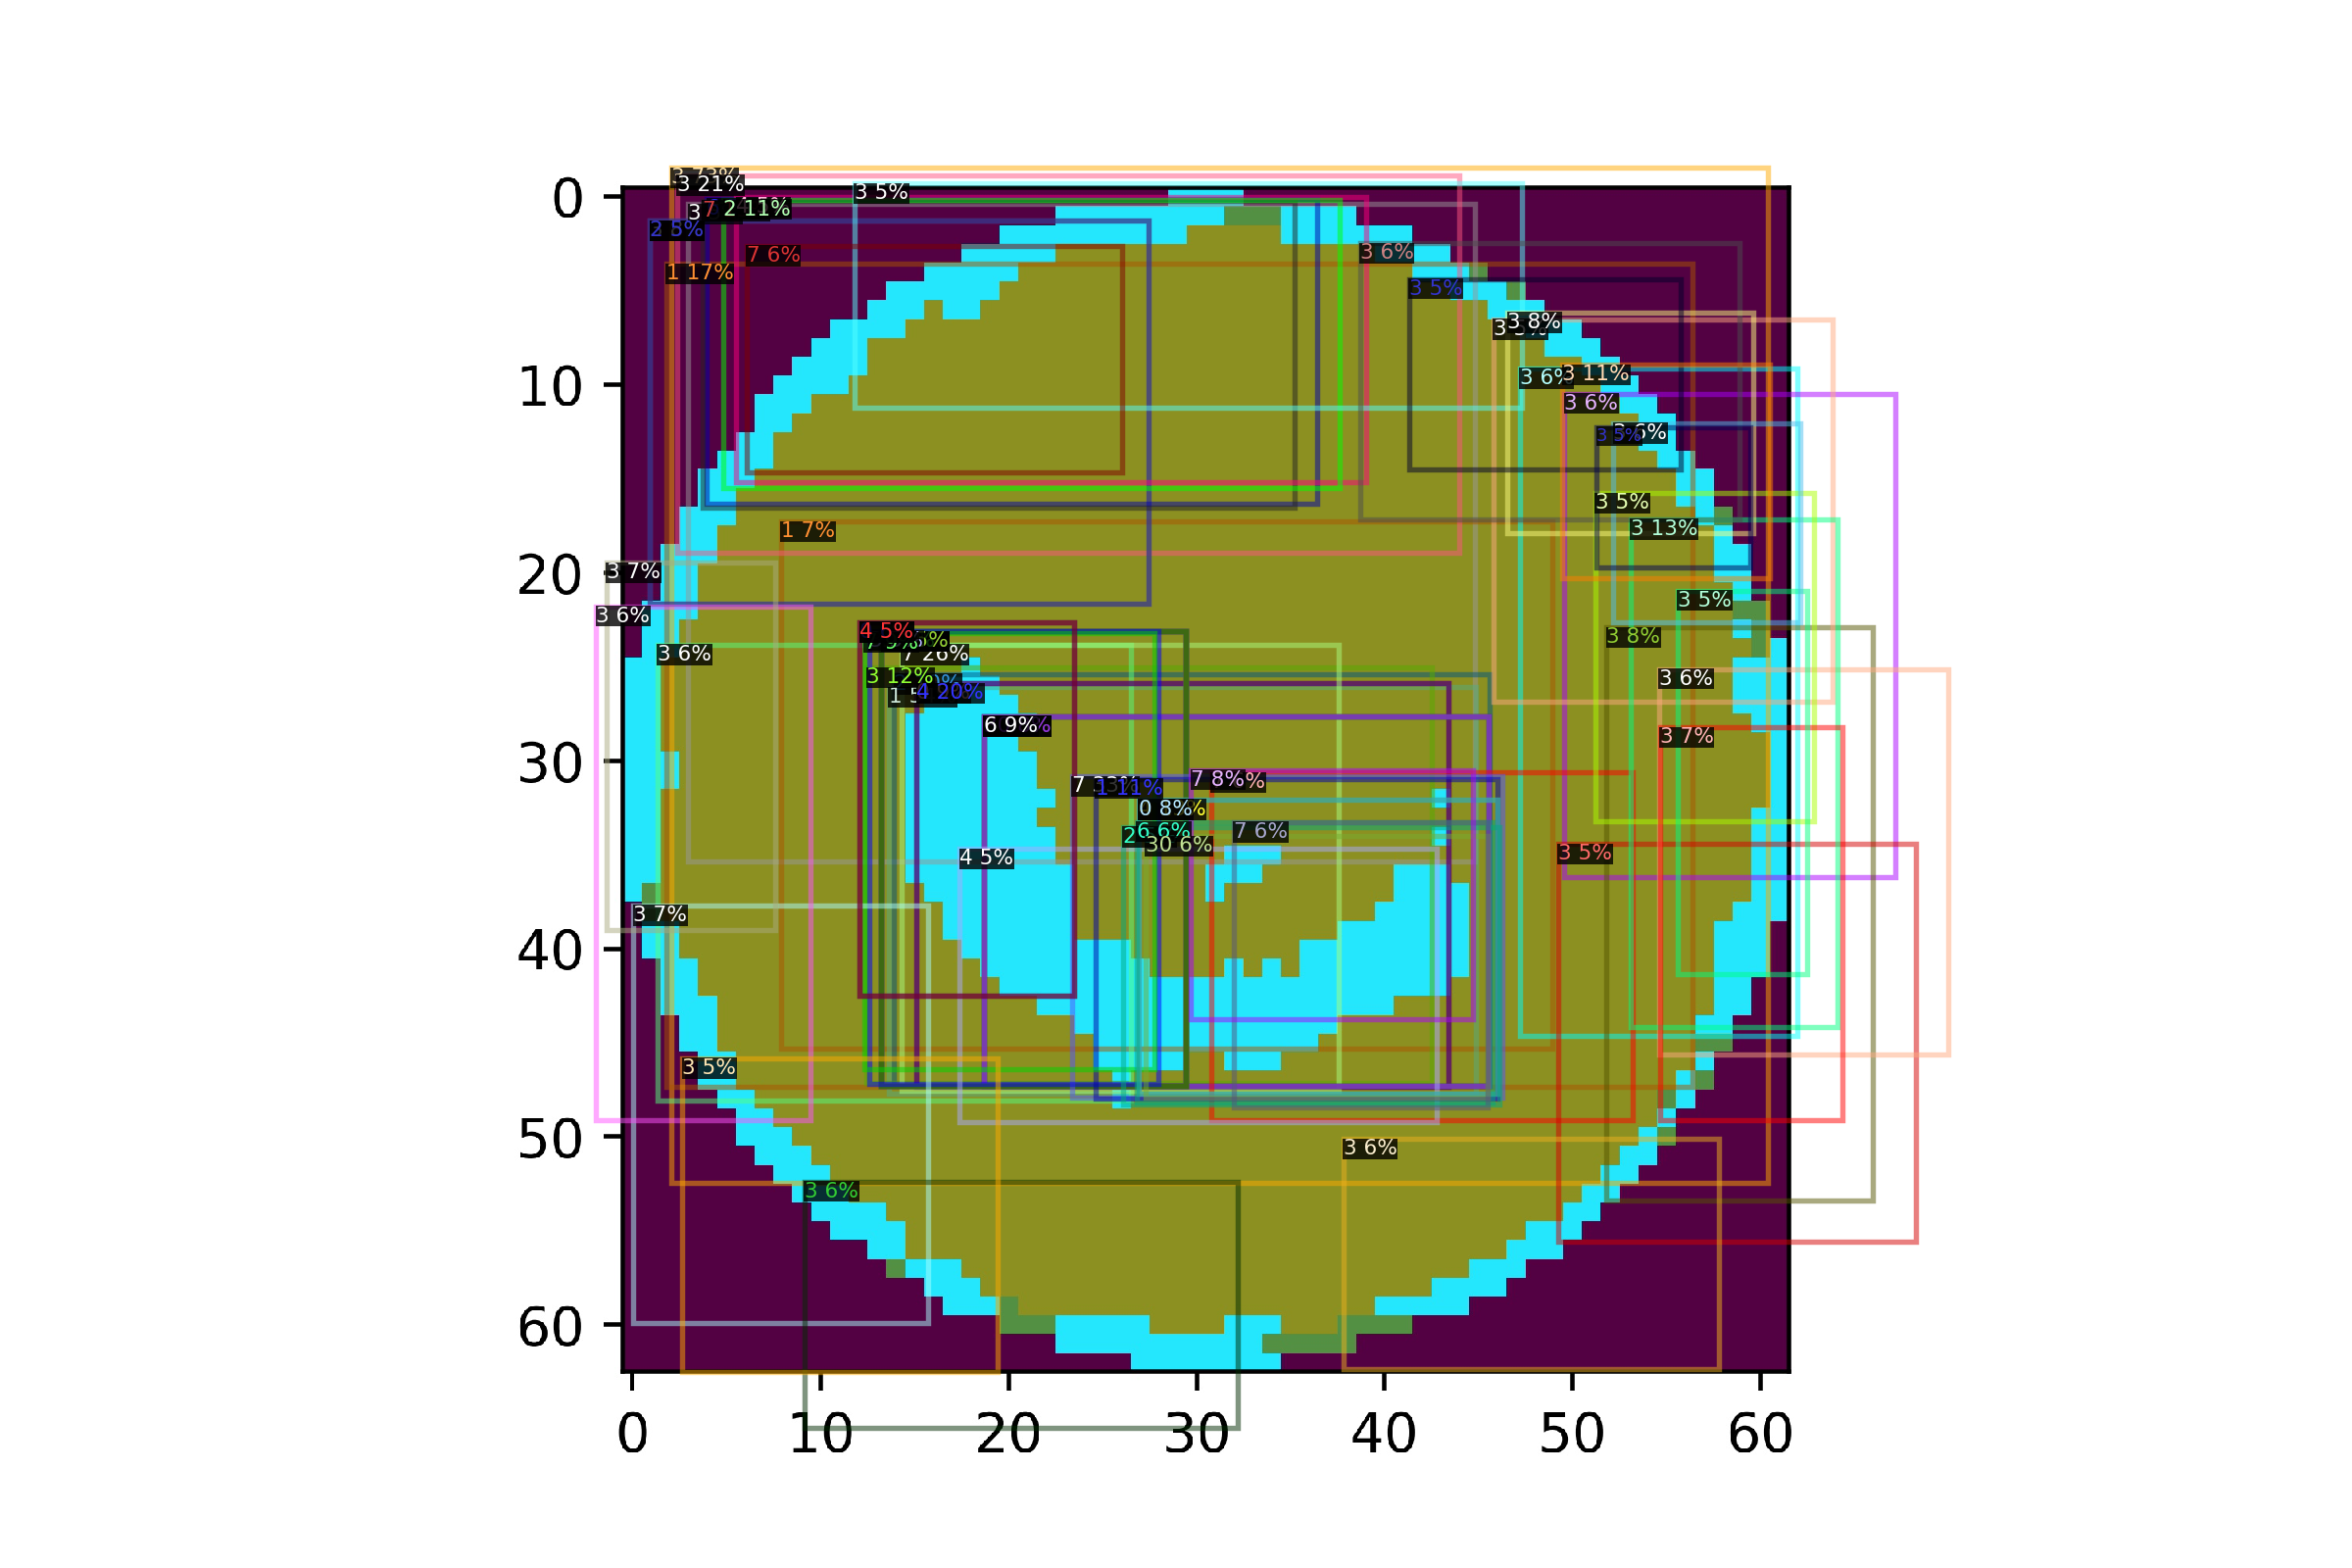

In [33]:
from detectron2.utils.visualizer import ColorMode
im = cv2.imread("/content/drive/MyDrive/TNT_VISION/testimg/edge_ring220.jpg")
outputs = predictor(im)
v = Visualizer(im[:, :, ::-1],
                   scale=0.8
    )
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

Center :0, Donut : 1, Edge-Loc : 2, Edge-Ring : 3, Loc : 4, Near-full : 5,Random : 6,Scratch : 7, none : 8

In [34]:
outputs

{'instances': Instances(num_instances=72, image_height=2000, image_width=3000, fields=[pred_boxes: Boxes(tensor([[ 856.2107,  214.2822, 2255.0132, 1508.7839],
         [1133.8188,  876.6847, 1882.1764, 1394.8562],
         [1123.9438,  805.2715, 1512.3635, 1385.3309],
         [1366.8890,  990.4282, 1915.8726, 1400.2041],
         [1123.9438,  805.2715, 1512.3635, 1385.3309],
         [1149.9421,  822.4442, 1707.6033, 1390.9011],
         [1123.9438,  805.2715, 1512.3635, 1385.3309],
         [ 863.5824,  223.6441, 1861.2241,  705.5026],
         [1169.1484,  871.8563, 1847.8185, 1386.6998],
         [1123.9438,  805.2715, 1512.3635, 1385.3309],
         [ 849.7577,  336.7390, 2158.2881, 1386.6426],
         [ 895.6396,  256.1249, 1651.5535,  647.7986],
         [1452.5493, 1020.0416, 1909.9080, 1394.9254],
         [2079.5703,  662.6007, 2343.1250, 1310.1384],
         [1105.5029,  851.5657, 1826.2457, 1381.0127],
         [1397.3374,  993.4802, 1910.3027, 1400.6694],
         [ 922.7